In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [124]:
raw_data= pd.read_csv('1.04. Real-life example.csv')

In [125]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [126]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [127]:
data=raw_data.copy()

In [128]:
data = data.dropna()

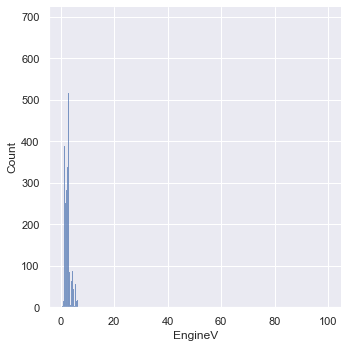

In [129]:
sns.displot(data['EngineV'])

In [130]:
data1=data[data['EngineV']<6.5]

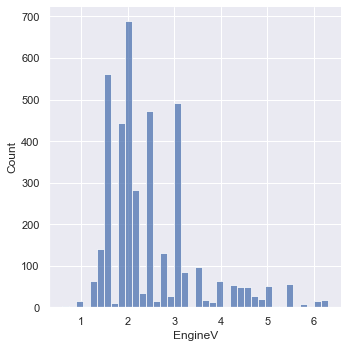

In [131]:
sns.displot(data1['EngineV'])

In [132]:
q=data1['EngineV'].quantile(0.99)

In [133]:
data2=data1[data1['EngineV']<q]

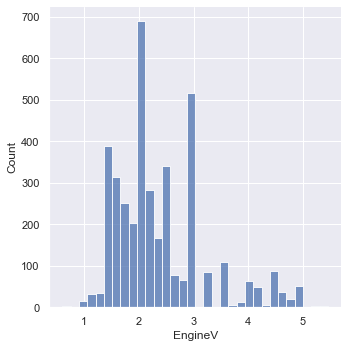

In [134]:
sns.displot(data2['EngineV'])

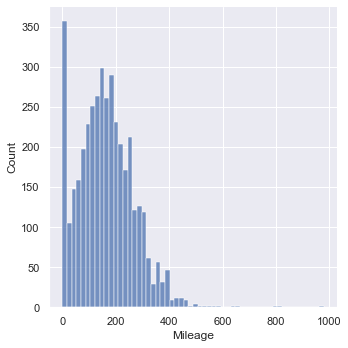

In [135]:
sns.displot(data['Mileage'])

In [136]:
q=data2['Mileage'].quantile(0.99)
data3=data2[data2['Mileage']<q]

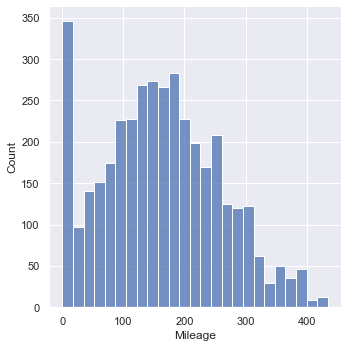

In [137]:
sns.displot(data3['Mileage'])

In [138]:
q=data2['Mileage'].quantile(0.1)
p=data2['Mileage'].quantile(0.95)
data3=data2[data2['Mileage']>q]
data3=data3[data3['Mileage']<p]


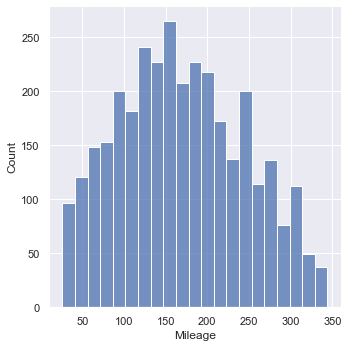

In [139]:
sns.displot(data3['Mileage'])

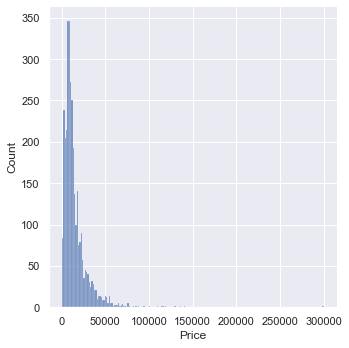

In [140]:
sns.displot(data3['Price'])

In [141]:
q = data3['Price'].quantile(0.99)
data4=data3[data3['Price']<q]

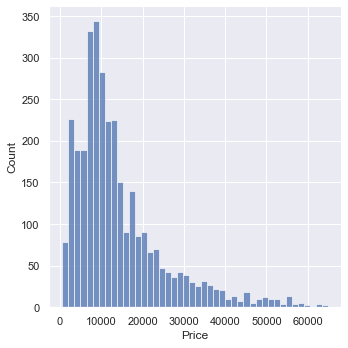

In [142]:
sns.displot(data4['Price'])

In [143]:
q = data4['Year'].quantile(0.1)
data5 = data4[data4['Year']>q]

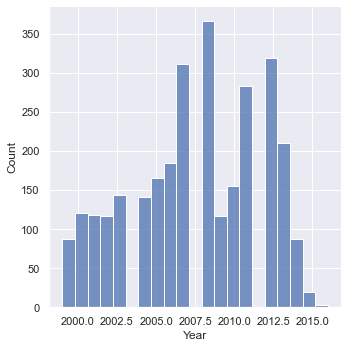

In [144]:
sns.displot(data5['Year'])

In [145]:
datar = data5.reset_index(drop=True)

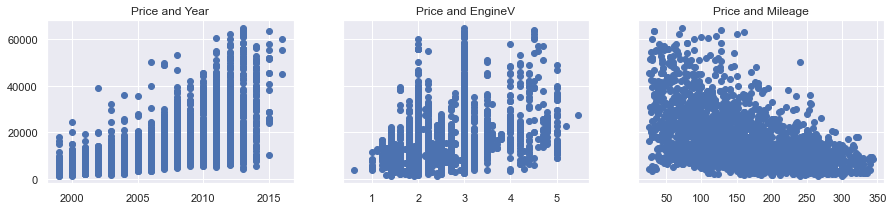

In [146]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize= (15,3))

ax1.scatter(data5['Year'],data5['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data5['EngineV'],data5['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data5['Mileage'],data5['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [148]:
data5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV
...,...,...,...,...,...,...,...,...,...
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla


In [159]:
data51= data5.copy()

In [160]:
log_price = np.log(data51['Price'])

In [161]:
data51['log_price']= log_price

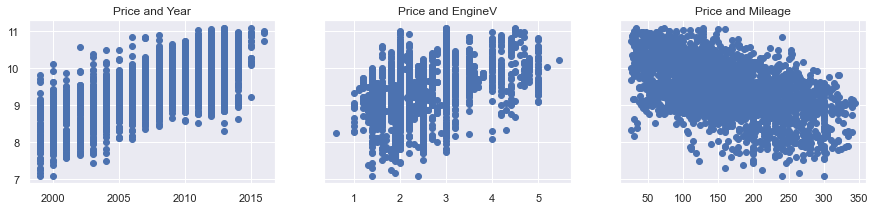

In [162]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize= (15,3))

ax1.scatter(data5['Year'],data5['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data5['EngineV'],data5['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data5['Mileage'],data5['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [163]:
data_cleaned = data5.drop(['Price'],axis=1)

In [164]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = data_cleaned[['EngineV','Mileage']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.299658,EngineV
1,4.299658,Mileage


In [166]:
data_r=data_cleaned.drop(['Year'], axis =1)
data_r=data_r.drop(['Model'], axis =1)


In [167]:
data_r.head()


,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
7,Audi,vagon,200,2.7,Diesel,yes,9.560997
8,Renault,vagon,193,1.5,Diesel,yes,9.287209
9,Volkswagen,other,212,1.8,Gas,no,7.244228


In [168]:
data_f=data_r.reset_index(drop=True)

In [169]:
data_d=pd.get_dummies(data_f, drop_first=True)

In [170]:
data_d.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,212,1.8,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [171]:
data_d.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [172]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol','Registration_yes']

In [173]:
data_pre=data_d[cols]

In [174]:
data_pre.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,7.244228,212,1.8,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


## Linear Reg

In [188]:
targets = data_pre['log_price']

inputs = data_pre.drop(['log_price'], axis = 1)

In [189]:
from sklearn.preprocessing import StandardScaler as SS

In [190]:
scaler = SS()

In [191]:
scaler.fit(inputs) # The inputs are standardized so they can be compared

StandardScaler()

In [192]:
inputs_scaled = scaler.transform(inputs)

In [193]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [194]:
reg = LinearRegression()
y_test = y_test.reset_index(drop=True)


In [195]:
reg.fit(x_train, y_train)

LinearRegression()

In [196]:
y_hat = reg.predict(x_train)

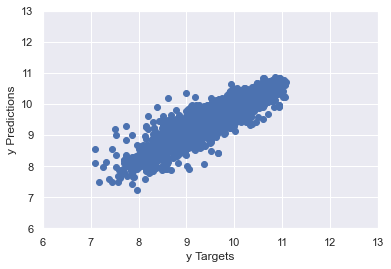

In [197]:
plt.scatter(y_train, y_hat)

plt.xlabel('y Targets')
plt.ylabel('y Predictions')

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

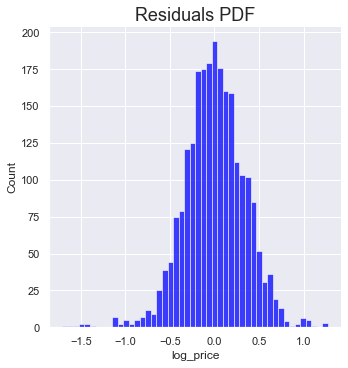

In [198]:
sns.displot(y_train - y_hat, color ='blue' )
plt.title("Residuals PDF", size=18)

In [199]:
reg.score(x_train,y_train)

0.7560412387868352

In [200]:
reg.intercept_

9.415455264234977

In [201]:
reg.coef_

array([-0.3263216 ,  0.1737759 ,  0.02330062, -0.00696442, -0.15193598,
       -0.19001704, -0.07052054, -0.07258617, -0.12539023, -0.08479445,
       -0.14473888, -0.09993228, -0.16011292, -0.09218697, -0.02879548,
       -0.12929864,  0.30278888])

In [202]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.326322
1,EngineV,0.173776
2,Brand_BMW,0.023301
3,Brand_Mercedes-Benz,-0.006964
4,Brand_Mitsubishi,-0.151936
5,Brand_Renault,-0.190017
6,Brand_Toyota,-0.070521
7,Brand_Volkswagen,-0.072586
8,Body_hatch,-0.125390
9,Body_other,-0.084794


In [203]:
data_cleaned['Brand'].unique()

array(['Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

In [204]:
y_hat_test = reg.predict(x_test)

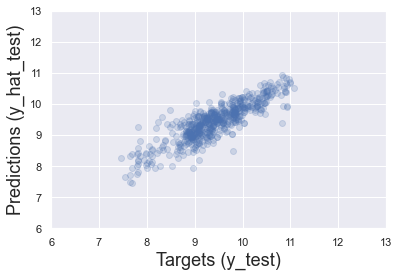

In [205]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [206]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7645.422583
1,13742.387759
2,13093.949783
3,36071.707979
4,6407.004936


In [207]:
y_test = y_test.reset_index(drop=True)


In [208]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7645.422583,10300.0
1,13742.387759,10700.0
2,13093.949783,8420.0
3,36071.707979,52300.0
4,6407.004936,6500.0
...,...,...
585,14265.547613,8300.0
586,20707.973125,29900.0
587,10063.066689,11115.0
588,15396.230140,18500.0


In [209]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [210]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7645.422583,10300.0,2654.577417,25.772596
1,13742.387759,10700.0,-3042.387759,28.433530
2,13093.949783,8420.0,-4673.949783,55.510092
3,36071.707979,52300.0,16228.292021,31.029239
4,6407.004936,6500.0,92.995064,1.430693
...,...,...,...,...
585,14265.547613,8300.0,-5965.547613,71.874068
586,20707.973125,29900.0,9192.026875,30.742565
587,10063.066689,11115.0,1051.933311,9.464087
588,15396.230140,18500.0,3103.769860,16.777134


In [211]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,590.000000,590.000000,590.000000,590.000000
mean,14725.185516,15480.961017,755.775501,28.897611
std,8870.250687,11503.134777,5916.940677,32.158956
min,1711.602033,1750.000000,-15586.391917,0.141855
25%,8544.181047,7999.250000,-2300.347451,9.938656
50%,12816.596155,11700.000000,-138.774543,21.749559
75%,18075.312261,19000.000000,2819.716661,35.126086
max,55889.624942,64000.000000,38072.695788,311.505484


In [216]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [217]:
# Finally, sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
83,12517.73,12500.00,-17.73,0.14
343,13375.80,13400.00,24.20,0.18
527,7525.47,7500.00,-25.47,0.34
184,16898.75,16999.00,100.25,0.59
24,8953.19,8900.00,-53.19,0.60
566,19135.44,18990.00,-145.44,0.77
423,18843.84,18700.00,-143.84,0.77
539,7531.00,7600.00,69.00,0.91
219,13422.45,13300.00,-122.45,0.92
510,51999.26,51500.00,-499.26,0.97
